# Pymaceuticals Inc.
---

### Analysis

- Capomulin seems to really start working after the 20 days 
- There is a strong positive correlation (0.84) between the mouse weight and tumor size, meaning they grow together. 
- Capomulin and ramicane contained the two largest amount of mice tested, and ramicane contained the lowest tumor volumnes. 
 

In [79]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mouse = len(combined_df["Mouse ID"].value_counts())
total_mouse

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']),"Mouse ID"].unique()
dupe_mouse

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
# dupe_mouse_df

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_df[combined_df['Mouse ID'].isin(dupe_mouse)==False]
# clean_data

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_count_mouse = len(clean_data["Mouse ID"].value_counts())
clean_count_mouse

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drugreg_groups = clean_data.groupby('Drug Regimen')

summary_stats = drugreg_groups['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, 'sem'])

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std Dev', 'Tumor Volume Std Err.']

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_df = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [10]:

mouse_tested = clean_data["Drug Regimen"].value_counts()
mouse_tested

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, 'Number of Mice')

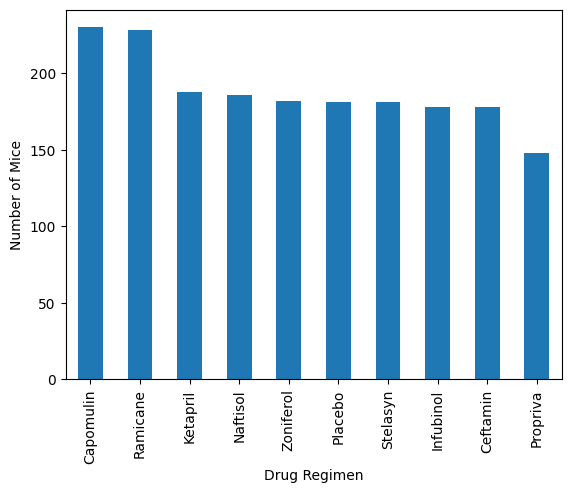

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plot_mouse = mouse_tested.plot.bar()  

plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Mice") 

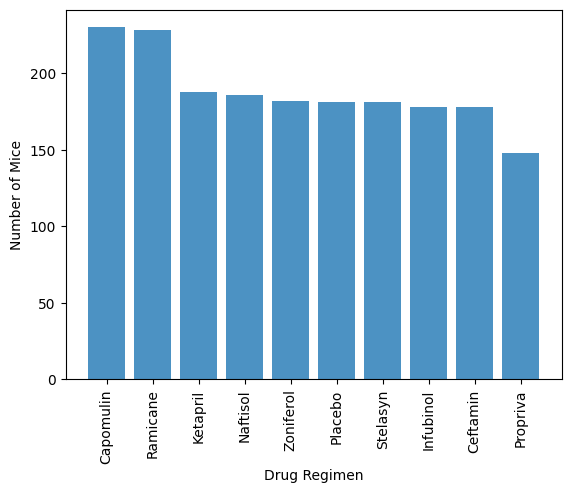

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mouse_tested.index.values
y_axis = mouse_tested.values

plt.bar(x_axis, y_axis,alpha=0.8, align='center')


plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

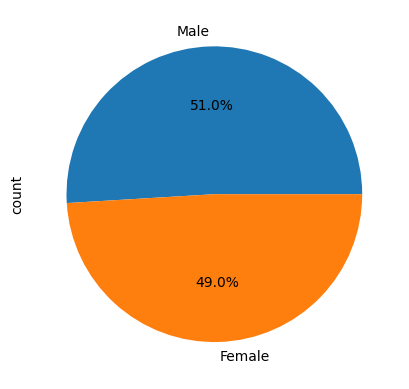

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_data["Sex"].value_counts()

sex_data.plot.pie(autopct= "%1.1f%%")
plt.show()

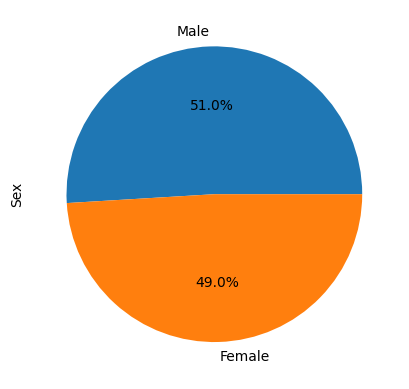

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_data = clean_data["Sex"].value_counts()

plt.pie(sex_data.values, labels=sex_data.index, autopct='%1.1f%%')

# set axis and title of the plot
plt.ylabel('Sex')


# show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_df = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin",:]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#Ill seperate this to the next cells

In [18]:
#capomulin merge
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint'] 
capomulin_vol = pd.DataFrame(capomulin_last) 
capomulin_merge = pd.merge(capomulin_vol,clean_data, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [19]:
#ramicane merge
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint'] 
ramicane_vol = pd.DataFrame(ramicane_last) 
ramicane_merge = pd.merge(ramicane_vol,clean_data, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [20]:
#infubinol merge
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint'] 
infubinol_vol = pd.DataFrame(infubinol_last) 
infubinol_merge = pd.merge(infubinol_vol,clean_data, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [21]:
#ceftamin merge
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint'] 
ceftamin_vol = pd.DataFrame(ceftamin_last) 
ceftamin_merge = pd.merge(ceftamin_vol,clean_data, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [32]:
#capomulin IQR
capomulin_tumor_vol = capomulin_merge["Tumor Volume (mm3)"]

capomulin_quartiles =capomulin_tumor_vol.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = upperq-lowerq


print(f"The lower quartile of capomulin tumors: {capomulin_lowerq}")
print(f"The upper quartile of capomulin tumors: {capomulin_upperq}")
print(f"The interquartile range of capomulin tumors: {capomulin_iqr}")
print(f"The median of capomulin tumors: {capomulin_quartiles[0.5]} ")

capomulin_lower_bound = capomulin_lowerq - (1.5*iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*iqr)

print(f"Values below {capomulin_lower_bound} could be outliers.")
print(f"Values above {capomulin_upper_bound} could be outliers.")

The lower quartile of capomulin tumors: 32.37735684
The upper quartile of capomulin tumors: 40.1592203
The interquartile range of capomulin tumors: 15.577752179999997
The median of capomulin tumors: 38.1251644 
Values below 9.010728570000001 could be outliers.
Values above 63.525848569999994 could be outliers.


In [33]:
#ramicane IQR
ramicane_tumor_vol = ramicane_merge["Tumor Volume (mm3)"]

ramicane_quartiles =ramicane_tumor_vol.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq


print(f"The lower quartile of ramicane tumors: {ramicane_lowerq}")
print(f"The upper quartile of ramicane tumors: {ramicane_upperq}")
print(f"The interquartile range of ramicane tumors: {ramicane_iqr}")
print(f"The median of ramicane tumors: {ramicane_quartiles[0.5]} ")

ramicane_lower_bound = ramicane_lowerq - (1.5*iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*iqr)

print(f"Values below {ramicane_lower_bound} could be outliers.")
print(f"Values above {ramicane_upper_bound} could be outliers.")

The lower quartile of ramicane tumors: 31.56046955
The upper quartile of ramicane tumors: 40.65900627
The interquartile range of ramicane tumors: 9.098536719999998
The median of ramicane tumors: 36.56165229 
Values below 8.193841280000004 could be outliers.
Values above 64.02563454 could be outliers.


In [34]:
#infubinol merge
infubinol_tumor_vol = infubinol_merge["Tumor Volume (mm3)"]

infubinol_quartiles =infubinol_tumor_vol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq


print(f"The lower quartile of infubinol tumors: {infubinol_lowerq}")
print(f"The upper quartile of infubinol tumors: {infubinol_upperq}")
print(f"The interquartile range of infubinol tumors: {infubinol_iqr}")
print(f"The median of infubinol tumors: {infubinol_quartiles[0.5]} ")

infubinol_lower_bound = infubinol_lowerq - (1.5*iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*iqr)

print(f"Values below {infubinol_lower_bound} could be outliers.")
print(f"Values above {infubinol_upper_bound} could be outliers.")

The lower quartile of infubinol tumors: 54.04860769
The upper quartile of infubinol tumors: 65.52574285
The interquartile range of infubinol tumors: 11.477135160000003
The median of infubinol tumors: 60.16518046 
Values below 30.68197942 could be outliers.
Values above 88.89237111999999 could be outliers.


In [35]:
#ceftamin merge
ceftamin_tumor_vol = ceftamin_merge["Tumor Volume (mm3)"]

ceftamin_quartiles =ceftamin_tumor_vol.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq


print(f"The lower quartile of ceftamin tumors: {ceftamin_lowerq}")
print(f"The upper quartile of ceftamin tumors: {ceftamin_upperq}")
print(f"The interquartile range of ceftamin tumors: {ceftamin_iqr}")
print(f"The median of ceftamin tumors: {ceftamin_quartiles[0.5]} ")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*iqr)

print(f"Values below {ceftamin_lower_bound} could be outliers.")
print(f"Values above {ceftamin_upper_bound} could be outliers.")

The lower quartile of ceftamin tumors: 48.72207785
The upper quartile of ceftamin tumors: 64.29983003
The interquartile range of ceftamin tumors: 15.577752179999997
The median of ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


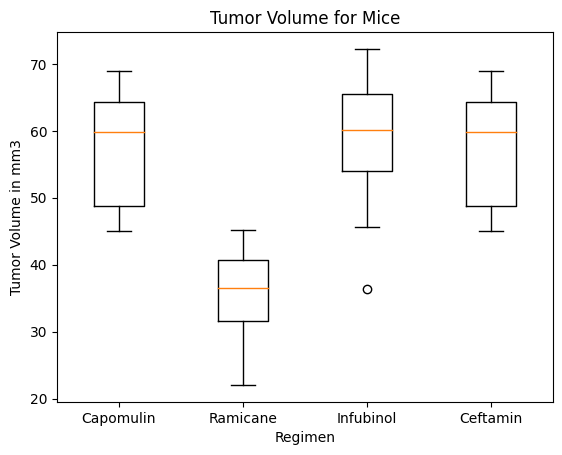

In [42]:
box_plot = [ceftamin_tumor_vol, ramicane_tumor_vol, infubinol_tumor_vol, ceftamin_tumor_vol]
regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for Mice')
ax1.set_ylabel('Tumor Volume in mm3')
ax1.set_xlabel('Regimen')
ax1.boxplot(box_plot, labels=regimen, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

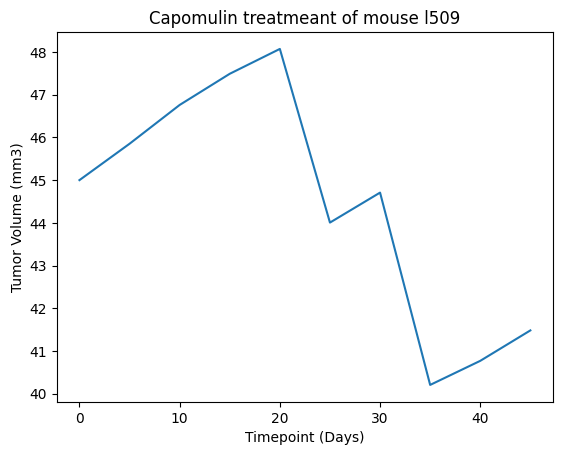

In [46]:
line = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
x_axis = line["Timepoint"]
y_axis = line["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis) 

In [49]:
capomulin_df.head()
# avg_capo_vol =capomulin_df.groupby(['Mouse ID']).mean()

# avg_capo_vol.head()
#plt.scatter(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'])

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

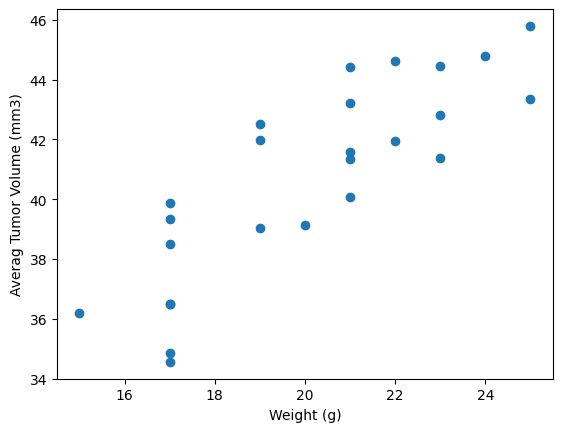

In [62]:
fig1, ax1 = plt.subplots()
avg_capo_vol = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_capo_g = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()

plt.scatter(avg_capo_g,avg_capo_vol)

plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

In [69]:
# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(avg_capo_g,avg_capo_vol)
print(f"Correlation with mouse weight and average tumor volume is {round(correlation[0],2)}")

Correlation with mouse weight and average tumor volume is 0.84


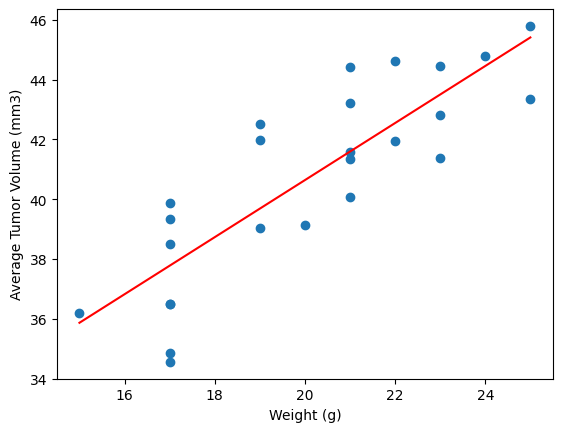

In [83]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
avg_capo_vol = capomulin_df.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
avg_capo_g = capomulin_df.groupby(['Mouse ID'])['Weight (g)'].mean()

plt.scatter(avg_capo_g, avg_capo_vol)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Calculate the regression line parameters
slope, intercept, r_value, p_value, std_err = st.linregress(avg_capo_g, avg_capo_vol)

# Create an array of x-values for the regression line
x = np.array([min(avg_capo_g), max(avg_capo_g)])

# Calculate the corresponding y-values for the regression line using the equation y = mx + b
y = slope * x + intercept

# Plot the regression line
plt.plot(x, y, color='r')

plt.show()